In [15]:
!pip install nltk

import pandas as pd
import numpy as np
import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# download SMS spam dataset
!wget https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv

#load dataset
df = pd.read_csv("sms.tsv", sep="\t", header=None, names=["label", "message"])
df.head()

#remove lowercase, numbers, punctuation, stopwords
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                               # lowercasing
    text = re.sub(r'\d+', '', text)                   # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()                              # tokenize
    words = [w for w in words if w not in stopwords_set]  # remove stopwords
    return " ".join(words)

df["cleaned"] = df["message"].apply(clean_text)
df.head()

#split data and vectorize using TF-IDF
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned"], df["label"], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

#train with naive bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--2025-12-10 15:56:30--  https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [text/plain]
Saving to: ‘sms.tsv.1’

sms.tsv.1           100%[===================>] 466.71K  --.-KB/s    in 0.02s   

2025-12-10 15:56:30 (19.0 MB/s) - ‘sms.tsv.1’ saved [477907/477907]

Accuracy: 0.9713004484304932

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[966  

In [16]:
from google.colab import files
uploaded = files.upload()

import zipfile

zip_ref = zipfile.ZipFile("archive.zip", 'r')
zip_ref.extractall()
zip_ref.close()

Saving archive.zip to archive (1).zip


In [17]:
import os
os.listdir()

['.config',
 'archive (1).zip',
 'sentimentdataset.csv',
 'sms.tsv.1',
 'sms.tsv',
 'archive.zip',
 'sample_data']

In [18]:
import pandas as pd
df2 = pd.read_csv("sentimentdataset.csv")
df2.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [19]:
import os
os.listdir()


['.config',
 'archive (1).zip',
 'sentimentdataset.csv',
 'sms.tsv.1',
 'sms.tsv',
 'archive.zip',
 'sample_data']

In [20]:
import pandas as pd
df2 = pd.read_csv("sentimentdataset.csv")
df2.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [21]:
df2["cleaned"] = df2["Text"].astype(str).apply(clean_text)


In [22]:
X2_tfidf = vectorizer.transform(df2["cleaned"])


In [23]:
df2["spam_prediction"] = model.predict(X2_tfidf)
df2.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,cleaned,spam_prediction
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park,ham
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning,ham
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout 💪,ham
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway,ham
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight,ham


from matplotlib import pyplot as plt
_df_28['Unnamed: 0.1'].plot(kind='hist', bins=20, title='Unnamed: 0.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Retweets'].plot(kind='hist', bins=20, title='Retweets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('Timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('User').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Unnamed: 0.1', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Unnamed: 0', y='Retweets', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Retweets', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Likes', y='Hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.1']
  ys = series['Retweets']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Unnamed: 0.1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.1')
_ = plt.ylabel('Retweets')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.1']
  ys = series['Retweets']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Unnamed: 0.1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.1')
_ = plt.ylabel('Retweets')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.1']
  ys = series['Retweets']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Unnamed: 0.1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='Timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.1')
_ = plt.ylabel('Retweets')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.1']
  ys = series['Retweets']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('Unnamed: 0.1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('User')):
  _plot_series(series, series_name, i)
  fig.legend(title='User', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.1')
_ = plt.ylabel('Retweets')

from matplotlib import pyplot as plt
_df_44['Unnamed: 0.1'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0.1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Retweets'].plot(kind='line', figsize=(8, 4), title='Retweets')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_48.groupby('Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Text')
_ = plt.ylabel('Sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Timestamp'].value_counts()
    for x_label, grp in _df_49.groupby('Sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sentiment')
_ = plt.ylabel('Timestamp')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['User'].value_counts()
    for x_label, grp in _df_50.groupby('Timestamp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Timestamp')
_ = plt.ylabel('User')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Platform'].value_counts()
    for x_label, grp in _df_51.groupby('User')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('User')
_ = plt.ylabel('Platform')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='Unnamed: 0.1', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='Unnamed: 0.1', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['Timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='Unnamed: 0.1', y='Timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['User'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='Unnamed: 0.1', y='User', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Spam columns ready! Sample:


,Text,spam_prediction,is_spam
0,Enjoying a beautiful day at the park! ...,ham,0
1,Traffic was terrible this morning. ...,ham,0
2,Just finished an amazing workout! 💪 ...,ham,0
3,Excited about the upcoming weekend getaway! ...,ham,0
4,Trying out a new recipe for dinner tonight. ...,ham,0


Using 732 samples for t-SNE...
Generating BERT embeddings...


Batches:   0%|          | 0/23 [00:00<?, ?it/s]

Embeddings shape: (732, 384)
Running t-SNE...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE result shape: (732, 2)


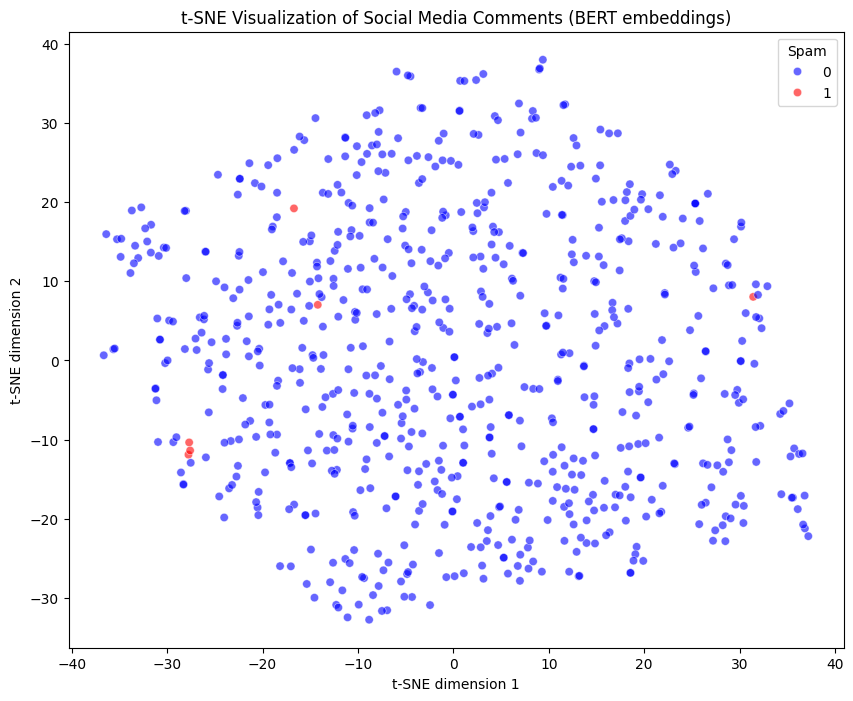

In [30]:
!pip install -q sentence-transformers scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer

if "spam_prediction" not in df2.columns or "is_spam" not in df2.columns:
    print("Creating spam predictions...")
    df2["spam_prediction"] = model.predict(vectorizer.transform(df2["cleaned"]))
    df2["is_spam"] = df2["spam_prediction"].apply(lambda x: 1 if x == "spam" else 0)

print("Spam columns ready! Sample:")
display(df2[["Text", "spam_prediction", "is_spam"]].head())

sample_size = min(1000, len(df2))  #adjust to dataset size
df_sample = df2.sample(n=sample_size, random_state=42)

texts_sample = df_sample["cleaned"].astype(str).tolist() #messages
labels_sample = df_sample["is_spam"].values #colors

print(f"Using {sample_size} samples for t-SNE...")

print("Generating BERT embeddings...")
model_bert = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model_bert.encode(texts_sample, show_progress_bar=True)
print("Embeddings shape:", embeddings.shape)

print("Running t-SNE...")
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)
print("t-SNE result shape:", embeddings_2d.shape)

df_vis = pd.DataFrame()
df_vis['x'] = embeddings_2d[:,0]
df_vis['y'] = embeddings_2d[:,1]
df_vis['is_spam'] = labels_sample

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='x', y='y',
    hue='is_spam',
    palette={0:'blue', 1:'red'},
    alpha=0.6,
    data=df_vis
)
plt.title("t-SNE Visualization of Social Media Comments (BERT embeddings)")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.legend(title='Spam')
plt.show()

